In [7]:
import numpy as np
import matplotlib.pyplot as plt
FINAL_CAPITAL = 100
P_H = 0.4
GAMMA = 1

def calculate_expected_val(state, action):
    next_state_prob = np.zeros(FINAL_CAPITAL-1)
    try:
        next_state_prob[state - action] = 1 - P_H
    except:
        pass

    try:
        next_state_prob[state + action] = P_H
    except:
        return next_state_prob, P_H

    return next_state_prob, 0

def value_iteration(theta):
    state_values = np.zeros(FINAL_CAPITAL+1)
    state_values[0] = 0
    state_values[FINAL_CAPITAL] = 1

    while True:
        delta = 0
        for s in range(1, FINAL_CAPITAL):
            v_old = state_values[s]
            v_new = []
            for a in range(1, min(s, 100-s)+1):
                next_state_win = s + a
                val_action = P_H * state_values[next_state_win] + (1 - P_H) * state_values[s - a]
                v_new.append(val_action)
            if v_new:
                state_values[s] = max(v_new)

            delta = max(delta, abs(v_old - state_values[s]))

        if delta < theta:
            break

    policy = np.zeros(FINAL_CAPITAL+1)

    for s in range(1, FINAL_CAPITAL):
        best_exp_val = -1
        optimal_action = 0

        possible_actions = range(1, min(s, FINAL_CAPITAL - s) + 1)
        for a in possible_actions:
            current_action_val = P_H * state_values[s + a] + (1 - P_H) * state_values[s - a]

            if  current_action_val > best_exp_val:
                best_exp_val = current_action_val
                optimal_action = a

        policy[s] = optimal_action


    return policy, state_values

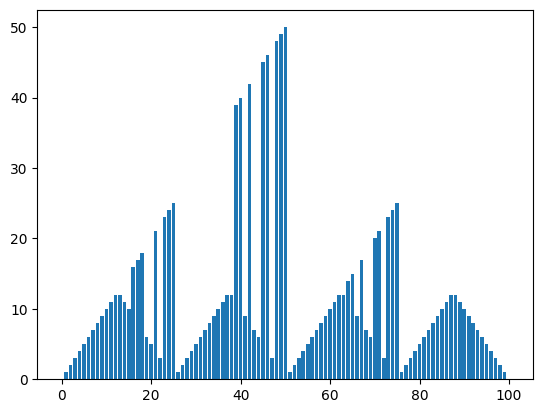

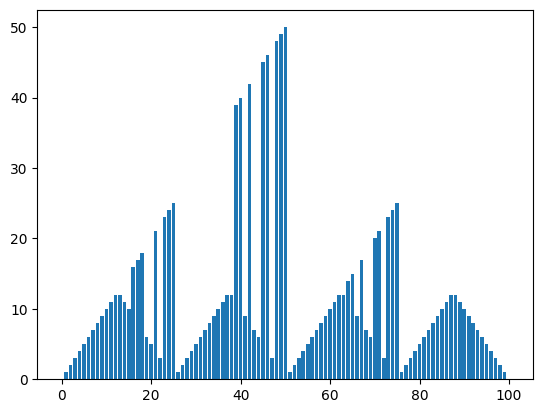

In [9]:
pol, s_v = value_iteration(1e-8)
plt.bar(range(len(pol)), pol)
plt.show()

P_H = 0.25
pol, s_v = value_iteration(1e-8)
plt.bar(range(len(pol)), pol)
plt.show()